In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pathlib

dir = pathlib.Path(os.getcwd()).absolute().parent.parent
dir

WindowsPath('C:/Users/Abhijeet/Documents/GitHub/dsba4152')

In [3]:
os.chdir(dir)

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [5]:
from dsba4152.utils.get_test_train import GetTestTrain

In [6]:
root_path = "F:/Data/satimages/v4composite/untar/untar/countries/dataset/"
csv_path = "./data_c/gdp_melted.csv"
X , y , years = GetTestTrain(root_path , csv_path,"IND").get_all_data()

In [64]:
ss = StandardScaler()
y = ss.fit_transform(y.reshape(-1,1))

In [7]:
X.shape

(357, 3693, 3797)

In [8]:
imgdf = pd.DataFrame({ "gdp" : y , "year" : years}).reset_index()

In [9]:
imgdf["year"].unique()

array([1993, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011])

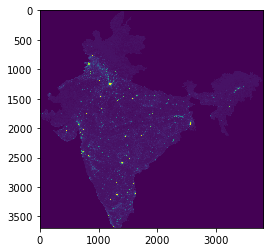

In [11]:
plt.imshow(X[imgdf[imgdf["year"] == 1993].loc[0, "index"]])

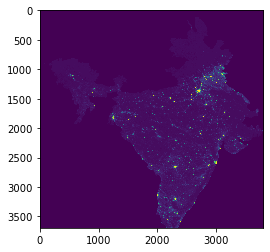

In [12]:
plt.imshow(X[imgdf[imgdf["year"] == 2006].head(1)["index"].values[0]])

In [13]:
im1993 = X[imgdf[imgdf["year"] == 1993].head(1)["index"].values[0]]
im2003 = X[imgdf[imgdf["year"] == 2003].head(1)["index"].values[0]]
im2011 = X[imgdf[imgdf["year"] == 2011].head(1)["index"].values[0]]

In [14]:
refyear = imgdf["year"].unique()[0]
refimg = X[imgdf[imgdf["year"] == refyear].head(1)["index"].values[0]]
space =  np.geomspace(0.5,1,1000)
bins = np.quantile(refimg ,space)

In [15]:
def thresh(im , t=970):
    g = np.digitize(im , bins)
    return (g > t)

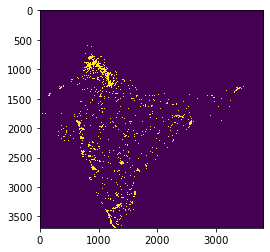

In [16]:
plt.imshow(thresh(im1993))

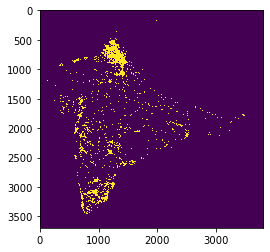

In [17]:
plt.imshow(thresh(im2003))

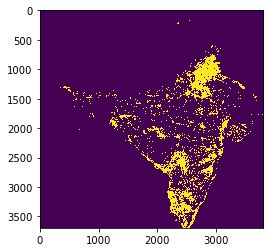

In [18]:
plt.imshow(thresh(im2011))

In [19]:
X[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [25]:
import cv2

In [28]:
X[:50].shape

(50, 3693, 3797)

In [53]:
X50 = np.array([cv2.resize(im ,(128,128) ,cv2.INTER_CUBIC) for im in X])
X50 = X50[..., np.newaxis]

In [54]:
input_shape = X50.shape
input_shape

(357, 128, 128, 1)

In [46]:
from keras.models import Sequential
from keras.layers import Dense , MaxPooling2D, Flatten
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import Conv2D
import keras.backend as K
from keras.metrics import RootMeanSquaredError

In [65]:
def build_model(input_shape):
    def model():
        model = Sequential()
        model.add(Conv2D(2, 3, activation='relu', input_shape=input_shape[1:]))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        model.add(Flatten())
        model.add(Dense(13, kernel_initializer='normal', activation='relu'))
        model.add(Dense(1, kernel_initializer='normal'))

        model.compile(loss="mean_squared_error",metrics=[RootMeanSquaredError(name='rmse')], optimizer='adam')
        return model
    return model
    

In [67]:
estimator = KerasRegressor(build_fn=build_model(input_shape), epochs=500, verbose=1)

In [68]:
from sklearn.model_selection import cross_validate

In [ ]:
cross_validate(estimator, X50 , y)

Epoch 1/5000
285/285 [==============================] - 1s 3ms/step - loss: 7.5881 - rmse: 2.7547
Epoch 2/5000
285/285 [==============================] - 1s 2ms/step - loss: 1.0468 - rmse: 1.0231
Epoch 3/5000
285/285 [==============================] - 1s 2ms/step - loss: 0.9998 - rmse: 0.9999
Epoch 4/5000
285/285 [==============================] - 1s 2ms/step - loss: 0.9919 - rmse: 0.9960
Epoch 5/5000
285/285 [==============================] - 1s 2ms/step - loss: 0.9801 - rmse: 0.9900
Epoch 6/5000
285/285 [==============================] - 1s 2ms/step - loss: 0.9618 - rmse: 0.9807
Epoch 7/5000
285/285 [==============================] - 1s 2ms/step - loss: 0.9267 - rmse: 0.9626
Epoch 8/5000
285/285 [==============================] - 1s 2ms/step - loss: 0.8950 - rmse: 0.9460
Epoch 9/5000
285/285 [==============================] - 1s 2ms/step - loss: 0.8684 - rmse: 0.9319
Epoch 10/5000
285/285 [==============================] - 1s 2ms/step - loss: 0.8506 - rmse: 0.9223
Epoch 11/5000
285/2

285/285 [==============================] - 1s 3ms/step - loss: 0.3194 - rmse: 0.5651
Epoch 84/5000
285/285 [==============================] - 1s 2ms/step - loss: 0.3191 - rmse: 0.5649
Epoch 85/5000
285/285 [==============================] - 1s 2ms/step - loss: 0.3189 - rmse: 0.5647
Epoch 86/5000
285/285 [==============================] - 1s 2ms/step - loss: 0.3188 - rmse: 0.5646
Epoch 87/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.3188 - rmse: 0.5647
Epoch 88/5000
285/285 [==============================] - 1s 2ms/step - loss: 0.3189 - rmse: 0.5647
Epoch 89/5000
285/285 [==============================] - 1s 2ms/step - loss: 0.3190 - rmse: 0.5648
Epoch 90/5000
285/285 [==============================] - 1s 2ms/step - loss: 0.3192 - rmse: 0.5650
Epoch 91/5000
285/285 [==============================] - 1s 2ms/step - loss: 0.3205 - rmse: 0.5661
Epoch 92/5000
285/285 [==============================] - 1s 2ms/step - loss: 0.3201 - rmse: 0.5657
Epoch 93/5000
285/285 [=

285/285 [==============================] - 1s 3ms/step - loss: 0.2710 - rmse: 0.5206: 0s - loss: 0.3060 - rmse: 
Epoch 165/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.2710 - rmse: 0.5205
Epoch 166/5000
285/285 [==============================] - 1s 2ms/step - loss: 0.2709 - rmse: 0.5204
Epoch 167/5000
285/285 [==============================] - 1s 2ms/step - loss: 0.2708 - rmse: 0.5204
Epoch 168/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.2708 - rmse: 0.5204
Epoch 169/5000
285/285 [==============================] - 1s 2ms/step - loss: 0.2707 - rmse: 0.5203
Epoch 170/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.2707 - rmse: 0.5203
Epoch 171/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.2706 - rmse: 0.5202
Epoch 172/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.2706 - rmse: 0.5202
Epoch 173/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.2706 - 

285/285 [==============================] - 1s 3ms/step - loss: 0.2704 - rmse: 0.5200: 0s - loss: 0.2045 - rm
Epoch 246/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.2704 - rmse: 0.5200
Epoch 247/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.2704 - rmse: 0.5200
Epoch 248/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.2704 - rmse: 0.5200
Epoch 249/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.2709 - rmse: 0.5205
Epoch 250/5000
285/285 [==============================] - 1s 2ms/step - loss: 0.2709 - rmse: 0.5205
Epoch 251/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.2712 - rmse: 0.5208
Epoch 252/5000
285/285 [==============================] - 1s 2ms/step - loss: 0.2708 - rmse: 0.5204
Epoch 253/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.2394 - rmse: 0.4893
Epoch 254/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.2450 - rmse

285/285 [==============================] - 1s 4ms/step - loss: 0.0948 - rmse: 0.3080
Epoch 327/5000
285/285 [==============================] - 1s 5ms/step - loss: 0.0967 - rmse: 0.3110
Epoch 328/5000
285/285 [==============================] - 1s 4ms/step - loss: 0.0967 - rmse: 0.3110
Epoch 329/5000
285/285 [==============================] - 1s 4ms/step - loss: 0.0978 - rmse: 0.3127
Epoch 330/5000
285/285 [==============================] - 1s 4ms/step - loss: 0.0981 - rmse: 0.3132
Epoch 331/5000
285/285 [==============================] - 1s 4ms/step - loss: 0.0997 - rmse: 0.3158
Epoch 332/5000
285/285 [==============================] - 1s 4ms/step - loss: 0.1032 - rmse: 0.3212
Epoch 333/5000
285/285 [==============================] - 2s 5ms/step - loss: 0.1120 - rmse: 0.3346
Epoch 334/5000
285/285 [==============================] - 1s 5ms/step - loss: 0.1036 - rmse: 0.3219
Epoch 335/5000
285/285 [==============================] - 1s 5ms/step - loss: 0.0984 - rmse: 0.3138
Epoch 336/5000


285/285 [==============================] - 1s 2ms/step - loss: 0.0927 - rmse: 0.3044
Epoch 408/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0927 - rmse: 0.3045
Epoch 409/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0927 - rmse: 0.3044
Epoch 410/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0927 - rmse: 0.3044
Epoch 411/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0927 - rmse: 0.3045
Epoch 412/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0927 - rmse: 0.3044
Epoch 413/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0927 - rmse: 0.3045
Epoch 414/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0927 - rmse: 0.3045
Epoch 415/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0928 - rmse: 0.3047
Epoch 416/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0928 - rmse: 0.3046
Epoch 417/5000


285/285 [==============================] - 1s 3ms/step - loss: 0.0775 - rmse: 0.2785
Epoch 490/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0777 - rmse: 0.2787
Epoch 491/5000
285/285 [==============================] - 1s 4ms/step - loss: 0.0778 - rmse: 0.2790
Epoch 492/5000
285/285 [==============================] - 1s 4ms/step - loss: 0.0776 - rmse: 0.2786
Epoch 493/5000
285/285 [==============================] - 1s 4ms/step - loss: 0.0776 - rmse: 0.2786
Epoch 494/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0775 - rmse: 0.2783
Epoch 495/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0778 - rmse: 0.2790
Epoch 496/5000
285/285 [==============================] - 1s 4ms/step - loss: 0.0798 - rmse: 0.2825
Epoch 497/5000
285/285 [==============================] - 2s 6ms/step - loss: 0.0751 - rmse: 0.2741
Epoch 498/5000
285/285 [==============================] - 2s 6ms/step - loss: 0.0725 - rmse: 0.2693
Epoch 499/5000


285/285 [==============================] - 1s 3ms/step - loss: 0.0707 - rmse: 0.2659
Epoch 571/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0711 - rmse: 0.2667
Epoch 572/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0734 - rmse: 0.2709
Epoch 573/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0728 - rmse: 0.2698
Epoch 574/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0731 - rmse: 0.2703
Epoch 575/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0741 - rmse: 0.2723
Epoch 576/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0760 - rmse: 0.2758
Epoch 577/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0740 - rmse: 0.2721: 0s - loss: 0.0527 - 
Epoch 578/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0756 - rmse: 0.2750
Epoch 579/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0757 - rmse: 

285/285 [==============================] - 1s 3ms/step - loss: 0.0682 - rmse: 0.2611
Epoch 652/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0682 - rmse: 0.2612
Epoch 653/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0682 - rmse: 0.2611
Epoch 654/5000
285/285 [==============================] - 1s 2ms/step - loss: 0.0683 - rmse: 0.2613
Epoch 655/5000
285/285 [==============================] - 1s 2ms/step - loss: 0.0686 - rmse: 0.2620
Epoch 656/5000
285/285 [==============================] - 1s 2ms/step - loss: 0.0691 - rmse: 0.2629
Epoch 657/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0707 - rmse: 0.2658
Epoch 658/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0722 - rmse: 0.2687
Epoch 659/5000
285/285 [==============================] - 1s 2ms/step - loss: 0.0755 - rmse: 0.2747
Epoch 660/5000
285/285 [==============================] - 1s 2ms/step - loss: 0.0760 - rmse: 0.2757
Epoch 661/5000


285/285 [==============================] - 1s 3ms/step - loss: 0.0650 - rmse: 0.2550
Epoch 734/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0651 - rmse: 0.2551
Epoch 735/5000
285/285 [==============================] - 1s 5ms/step - loss: 0.0652 - rmse: 0.2553
Epoch 736/5000
285/285 [==============================] - 2s 6ms/step - loss: 0.0653 - rmse: 0.2556
Epoch 737/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0654 - rmse: 0.2557
Epoch 738/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0653 - rmse: 0.2556
Epoch 739/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0651 - rmse: 0.2552
Epoch 740/5000
285/285 [==============================] - 1s 4ms/step - loss: 0.0651 - rmse: 0.2551
Epoch 741/5000
285/285 [==============================] - 1s 4ms/step - loss: 0.0650 - rmse: 0.2549
Epoch 742/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0650 - rmse: 0.2549
Epoch 743/5000


285/285 [==============================] - 1s 3ms/step - loss: 0.0670 - rmse: 0.2587
Epoch 815/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0667 - rmse: 0.2582
Epoch 816/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0662 - rmse: 0.2574
Epoch 817/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0666 - rmse: 0.2580
Epoch 818/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0675 - rmse: 0.2599
Epoch 819/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0668 - rmse: 0.2584: 0s - loss: 0.0337 - rmse
Epoch 820/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0674 - rmse: 0.2595
Epoch 821/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0677 - rmse: 0.2603
Epoch 822/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0682 - rmse: 0.2611
Epoch 823/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0676 - rm

285/285 [==============================] - 1s 3ms/step - loss: 0.0687 - rmse: 0.2621
Epoch 896/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0688 - rmse: 0.2624
Epoch 897/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0689 - rmse: 0.2625
Epoch 898/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0700 - rmse: 0.2645
Epoch 899/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0686 - rmse: 0.2620
Epoch 900/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0693 - rmse: 0.2632
Epoch 901/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0679 - rmse: 0.2606
Epoch 902/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0668 - rmse: 0.2585
Epoch 903/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0679 - rmse: 0.2606
Epoch 904/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0712 - rmse: 0.2669
Epoch 905/5000


285/285 [==============================] - 1s 3ms/step - loss: 0.0648 - rmse: 0.2545
Epoch 977/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0648 - rmse: 0.2545
Epoch 978/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0648 - rmse: 0.2545
Epoch 979/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0647 - rmse: 0.2545
Epoch 980/5000
285/285 [==============================] - 1s 2ms/step - loss: 0.0647 - rmse: 0.2544
Epoch 981/5000
285/285 [==============================] - 1s 2ms/step - loss: 0.0647 - rmse: 0.2544
Epoch 982/5000
285/285 [==============================] - 1s 2ms/step - loss: 0.0648 - rmse: 0.2545
Epoch 983/5000
285/285 [==============================] - 1s 2ms/step - loss: 0.0648 - rmse: 0.2545
Epoch 984/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0647 - rmse: 0.2544
Epoch 985/5000
285/285 [==============================] - 1s 2ms/step - loss: 0.0647 - rmse: 0.2545
Epoch 986/5000


285/285 [==============================] - 1s 2ms/step - loss: 0.0633 - rmse: 0.2517
Epoch 1058/5000
285/285 [==============================] - 1s 2ms/step - loss: 0.0633 - rmse: 0.2517
Epoch 1059/5000
285/285 [==============================] - 1s 2ms/step - loss: 0.0633 - rmse: 0.2517
Epoch 1060/5000
285/285 [==============================] - 1s 2ms/step - loss: 0.0633 - rmse: 0.2517
Epoch 1061/5000
285/285 [==============================] - 1s 2ms/step - loss: 0.0633 - rmse: 0.2517
Epoch 1062/5000
285/285 [==============================] - 1s 2ms/step - loss: 0.0633 - rmse: 0.2517
Epoch 1063/5000
285/285 [==============================] - 1s 2ms/step - loss: 0.0633 - rmse: 0.2517
Epoch 1064/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0633 - rmse: 0.2517
Epoch 1065/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0633 - rmse: 0.2517
Epoch 1066/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0633 - rmse: 0.2517
Epoch 

Epoch 1138/5000
285/285 [==============================] - 1s 4ms/step - loss: 0.0802 - rmse: 0.2832
Epoch 1139/5000
285/285 [==============================] - 1s 4ms/step - loss: 0.0742 - rmse: 0.2724
Epoch 1140/5000
285/285 [==============================] - 1s 4ms/step - loss: 0.0737 - rmse: 0.2714
Epoch 1141/5000
285/285 [==============================] - 1s 4ms/step - loss: 0.0709 - rmse: 0.2662
Epoch 1142/5000
285/285 [==============================] - 1s 4ms/step - loss: 0.0690 - rmse: 0.2626
Epoch 1143/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0695 - rmse: 0.2637
Epoch 1144/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0717 - rmse: 0.2677
Epoch 1145/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0742 - rmse: 0.2723
Epoch 1146/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0696 - rmse: 0.2639
Epoch 1147/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0674 - rms

285/285 [==============================] - 1s 2ms/step - loss: 0.0633 - rmse: 0.2517
Epoch 1220/5000
285/285 [==============================] - 1s 2ms/step - loss: 0.0633 - rmse: 0.2517
Epoch 1221/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0634 - rmse: 0.2517
Epoch 1222/5000
285/285 [==============================] - 1s 2ms/step - loss: 0.0633 - rmse: 0.2517
Epoch 1223/5000
285/285 [==============================] - 1s 2ms/step - loss: 0.0633 - rmse: 0.2517
Epoch 1224/5000
285/285 [==============================] - 1s 2ms/step - loss: 0.0633 - rmse: 0.2517
Epoch 1225/5000
285/285 [==============================] - 1s 2ms/step - loss: 0.0633 - rmse: 0.2517
Epoch 1226/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0633 - rmse: 0.2517
Epoch 1227/5000
285/285 [==============================] - 1s 2ms/step - loss: 0.0633 - rmse: 0.2517
Epoch 1228/5000
285/285 [==============================] - 1s 2ms/step - loss: 0.0634 - rmse: 0.2517
Epoch 

285/285 [==============================] - 1s 3ms/step - loss: 0.0744 - rmse: 0.2727
Epoch 1301/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0687 - rmse: 0.2622
Epoch 1302/5000
285/285 [==============================] - 1s 4ms/step - loss: 0.0726 - rmse: 0.2695
Epoch 1303/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0721 - rmse: 0.2685
Epoch 1304/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0702 - rmse: 0.2650
Epoch 1305/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0675 - rmse: 0.2597
Epoch 1306/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0659 - rmse: 0.2568
Epoch 1307/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0652 - rmse: 0.2554
Epoch 1308/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0642 - rmse: 0.2534
Epoch 1309/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0641 - rmse: 0.2532
Epoch 

Epoch 1381/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0633 - rmse: 0.2517
Epoch 1382/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0634 - rmse: 0.2517
Epoch 1383/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0633 - rmse: 0.2517
Epoch 1384/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0634 - rmse: 0.2517
Epoch 1385/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0634 - rmse: 0.2517
Epoch 1386/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0634 - rmse: 0.2518
Epoch 1387/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0635 - rmse: 0.2520
Epoch 1388/5000
285/285 [==============================] - 1s 2ms/step - loss: 0.0638 - rmse: 0.2525
Epoch 1389/5000
285/285 [==============================] - 1s 2ms/step - loss: 0.0639 - rmse: 0.2527
Epoch 1390/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0646 - rms

285/285 [==============================] - 1s 3ms/step - loss: 0.0634 - rmse: 0.2517
Epoch 1463/5000
285/285 [==============================] - 1s 2ms/step - loss: 0.0633 - rmse: 0.2517
Epoch 1464/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0633 - rmse: 0.2517
Epoch 1465/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0634 - rmse: 0.2517
Epoch 1466/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0634 - rmse: 0.2517
Epoch 1467/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0634 - rmse: 0.2517
Epoch 1468/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0634 - rmse: 0.2517
Epoch 1469/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0633 - rmse: 0.2517
Epoch 1470/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0633 - rmse: 0.2517
Epoch 1471/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0633 - rmse: 0.2517
Epoch 

285/285 [==============================] - 1s 3ms/step - loss: 0.0256 - rmse: 0.1600
Epoch 1544/5000
285/285 [==============================] - 1s 2ms/step - loss: 0.0237 - rmse: 0.1540
Epoch 1545/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0224 - rmse: 0.1498
Epoch 1546/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0227 - rmse: 0.1506
Epoch 1547/5000
285/285 [==============================] - 1s 2ms/step - loss: 0.0217 - rmse: 0.1473
Epoch 1548/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0204 - rmse: 0.1429
Epoch 1549/5000
285/285 [==============================] - 1s 2ms/step - loss: 0.0203 - rmse: 0.1424
Epoch 1550/5000
285/285 [==============================] - 1s 2ms/step - loss: 0.0230 - rmse: 0.1517
Epoch 1551/5000
285/285 [==============================] - 1s 2ms/step - loss: 0.0211 - rmse: 0.1453
Epoch 1552/5000
285/285 [==============================] - 1s 2ms/step - loss: 0.0197 - rmse: 0.1403
Epoch 

285/285 [==============================] - 1s 3ms/step - loss: 0.0130 - rmse: 0.1141: 0s - loss: 0.0219 - rmse
Epoch 1625/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0130 - rmse: 0.1141
Epoch 1626/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0130 - rmse: 0.1141
Epoch 1627/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0130 - rmse: 0.1142
Epoch 1628/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0130 - rmse: 0.1142
Epoch 1629/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0130 - rmse: 0.1141
Epoch 1630/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0130 - rmse: 0.1141
Epoch 1631/5000
285/285 [==============================] - 1s 3ms/step - loss: 0.0130 - rmse: 0.1141
Epoch 1632/5000
285/285 [==============================] - 1s 4ms/step - loss: 0.0130 - rmse: 0.1141
Epoch 1633/5000
285/285 [==============================] - 1s 4ms/step - loss: 0.